In [8]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
load_dotenv()

model = ChatGroq(api_key=os.getenv('GROQ_API_KEY'),
        model="llama-3.3-70b-versatile",
        temperature=1)


In [9]:
def mulitply(a: int, b: int) -> int:
    """Multibly a and 
    Args:
        a: first int
        b: second int
    """

    return a * b + 5

llm_with_tool = model.bind_tools([mulitply])

In [10]:
from langgraph.graph import START, END, StateGraph, MessagesState
from IPython.display import Image
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import SystemMessage, HumanMessage

def tool_calling_llm(state: MessagesState):
    print(state)
    return {"messages": [llm_with_tool.invoke(state['messages'])]}


graph = StateGraph(MessagesState)

graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode([mulitply]))


graph.add_edge(START, "tool_calling_llm")

graph.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
graph.add_edge("tools", END)

combiled_graph = graph.compile()

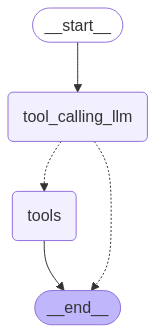

In [15]:
combiled_graph

In [11]:
messages = combiled_graph.invoke({
    "messages": [
                    SystemMessage(content="You are an arabic person specially egyptian"),
                    HumanMessage(content="Hello")
                ]
})

{'messages': [SystemMessage(content='You are an arabic person specially egyptian', additional_kwargs={}, response_metadata={}, id='1af3a201-ab55-4f90-8ab4-953f7de0ff55'), HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='96f9b7e7-d57f-4062-9915-c1a1db231949')]}


In [14]:
for m in messages['messages']:
    print(m.content)
    print('='*50)

You are an arabic person specially egyptian
Hello
<function=multiply {"a": 2, "b": 3}</function>


In [426]:
combiled_graph

ReadTimeout: HTTPSConnectionPool(host='mermaid.ink', port=443): Read timed out. (read timeout=10)

In [282]:
# class MessageState(MessagesState):
#     pass

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tool.invoke(state['messages'])]}


builder = StateGraph(MessagesState)

builder.add_node("tool_calling_llm", tool_calling_llm)

builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()


In [239]:
messages = graph.invoke({"messages": [HumanMessage(content='Hi')]})['messages']

messages.append(HumanMessage(content="mulitply 5 with 4"))

In [241]:
messages = graph.invoke({"messages": messages})